In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot

In [2]:
df = pd.read_csv("data/BurigangaMap.csv")

In [3]:
df

,Number,Sampling Point,Latitude,Longitude,NH4+ (mg/l),NO3 (mg/l),Phosphate(mg/l),Sulfates(mg/l),THB,TC,FC,FS,Vibrio C,E Coli
0,1,Gabtoli_Dhalweshri,23.787444,90.334250,2.6,13.1,3.5,8.77,8.36,200,158,69,10.28,12
1,2,Gabtoli_turag,23.784639,90.336417,3.2,12.4,5.7,11.40,15.99,240,213,100,12.67,58
2,3,Shah Cem MirpurGhat,23.774111,90.336833,8.0,17.3,6.0,12.40,21.95,390,290,77,16.40,69
3,4,Hazaribag_Shampur,23.749972,90.336750,9.4,24.6,3.5,9.25,31.70,410,370,80,18.91,70
4,5,Rayerbazar,23.740083,90.350281,2.1,9.8,3.9,9.20,6.14,160,120,110,8.52,6
5,6,Kholamora Bazar,23.716889,90.358917,5.6,18.2,5.0,9.86,18.73,355,285,75,15.44,65
6,7,Zinzira,23.710083,90.391972,4.6,12.4,6.5,18.70,10.58,198,171,42,11.39,33
7,8,Sadarghat_Terminal,23.702944,90.412139,11.2,24.5,5.3,10.80,35.00,750,560,125,18.83,130
8,9,Postogola Bridge,23.690139,90.424083,9.4,25.8,6.8,17.10,27.42,428,358,97,17.95,65


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

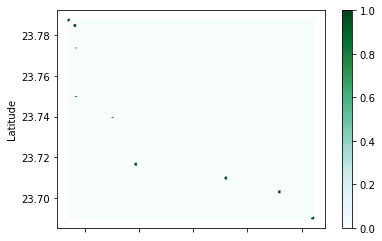

In [6]:
df.plot.hexbin(x = "Longitude", y = "Latitude")

In [7]:
import plotly.express as px
import plotly.io as pio

In [10]:
pio.renderers.default = "firefox"

In [13]:
from shapely.geometry import Point, Polygon

In [16]:
geometric_points = []
for xy in zip(df['Longitude'], df['Latitude']):
   geometric_points.append(Point(xy))


In [17]:
geometric_points

[<POINT (90.334 23.787)>,
 <POINT (90.336 23.785)>,
 <POINT (90.337 23.774)>,
 <POINT (90.337 23.75)>,
 <POINT (90.35 23.74)>,
 <POINT (90.359 23.717)>,
 <POINT (90.392 23.71)>,
 <POINT (90.412 23.703)>,
 <POINT (90.424 23.69)>]

In [20]:
df = gpd.GeoDataFrame(df,
                                 crs = {'init': 'epsg:4326'},
                                 geometry = geometric_points)
df

/home/RHHLab/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,Number,Sampling Point,Latitude,Longitude,NH4+ (mg/l),NO3 (mg/l),Phosphate(mg/l),Sulfates(mg/l),THB,TC,FC,FS,Vibrio C,E Coli,geometry
0,1,Gabtoli_Dhalweshri,23.787444,90.334250,2.6,13.1,3.5,8.77,8.36,200,158,69,10.28,12,POINT (90.33425 23.78744)
1,2,Gabtoli_turag,23.784639,90.336417,3.2,12.4,5.7,11.40,15.99,240,213,100,12.67,58,POINT (90.33642 23.78464)
2,3,Shah Cem MirpurGhat,23.774111,90.336833,8.0,17.3,6.0,12.40,21.95,390,290,77,16.40,69,POINT (90.33683 23.77411)
3,4,Hazaribag_Shampur,23.749972,90.336750,9.4,24.6,3.5,9.25,31.70,410,370,80,18.91,70,POINT (90.33675 23.74997)
4,5,Rayerbazar,23.740083,90.350281,2.1,9.8,3.9,9.20,6.14,160,120,110,8.52,6,POINT (90.35028 23.74008)
5,6,Kholamora Bazar,23.716889,90.358917,5.6,18.2,5.0,9.86,18.73,355,285,75,15.44,65,POINT (90.35892 23.71689)
6,7,Zinzira,23.710083,90.391972,4.6,12.4,6.5,18.70,10.58,198,171,42,11.39,33,POINT (90.39197 23.71008)
7,8,Sadarghat_Terminal,23.702944,90.412139,11.2,24.5,5.3,10.80,35.00,750,560,125,18.83,130,POINT (90.41214 23.70294)
8,9,Postogola Bridge,23.690139,90.424083,9.4,25.8,6.8,17.10,27.42,428,358,97,17.95,65,POINT (90.42408 23.69014)


In [21]:
type(df)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

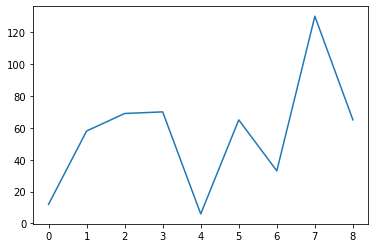

In [29]:
df["E Coli"].plot()

In [37]:
import matplotlib.pyplot as plt

In [39]:
cents = df.centroid
cents.head()

/tmp/ipykernel_12658/1994014309.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




0    POINT (90.33425 23.78744)
1    POINT (90.33642 23.78464)
2    POINT (90.33683 23.77411)
3    POINT (90.33675 23.74997)
4    POINT (90.35028 23.74008)
dtype: geometry

In [40]:
poly = df['geometry'][0]
pt1 = cents[0]
pt2 = cents[1]

<AxesSubplot:>

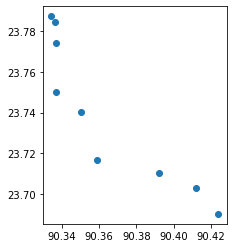

In [41]:
cents.plot()

In [42]:
import plotly.express as px

In [44]:
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='E Coli', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [45]:
buri = pd.read_json("data/Buriganga.json")

In [46]:
buri

,DD,DMS,geohash,UTM
lat,23.63333,"23º37'59.99"" N",wh0q3y7d1k,46Q 238147.22775276 2615984.39614307
lng,90.43333,"90º25'59.99"" E",wh0q3y7d1k,46Q 238147.22775276 2615984.39614307


In [49]:
from pykml import parser
with open('data/Sampling points.kml', 'r') as f:
    root = parser.parse(f).getroot()
namespace = {"kml": 'http://www.opengis.net/kml/2.2'}
pms = root.xpath(".//kml:Placemark[.//kml:Polygon]", namespaces=namespace)
for p in pms:
    print(p.Polygon.outerBoundaryIs.LinearRing.coordinates)

In [54]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
df = gpd.read_file('data/Sampling points.kml', driver='KML')

In [55]:
df

,Name,Description,geometry
0,S1,,POINT Z (90.33543 23.78439 0.00000)
1,S2,,POINT Z (90.33728 23.77330 0.00000)
2,S3,,POINT Z (90.33223 23.75465 0.00000)
3,S4,,POINT Z (90.34239 23.74744 0.00000)
4,S5,,POINT Z (90.35181 23.73740 0.00000)
5,S6,,POINT Z (90.35892 23.71689 0.00000)
6,S7,,POINT Z (90.39874 23.70999 0.00000)
7,S8,,POINT Z (90.41313 23.70073 0.00000)
8,S9,,POINT Z (90.45365 23.66122 0.00000)


In [56]:
type(df)

geopandas.geodataframe.GeoDataFrame